# Data Analysis and Visualization in Python

## 1. Exploratory Data Analysis (EDA)

### 1.1 Overview
Performed exploratory data analysis on a DataFrame containing information about G20 Summit 2023 videos and comments.

### 1.2 Initial Data Inspection
Explored the first few rows of the DataFrame using `df.head()` to understand the structure of the data.

### 1.3 Data Cleaning
Cleaned the comments column to remove user mentions using regular expressions.

### 1.4 Basic Data Statistics
Computed basic statistics on the DataFrame using `df.describe()` and `df.info()`.

---

## 2. Intermediate Data Analysis

### 2.1 Sentiment Analysis
Utilized the TextBlob library to perform sentiment analysis on the cleaned comments, categorizing them as Positive, Neutral, or Negative.

### 2.2 Clustering Documents
Used the SentenceTransformer and UMAP to cluster documents and created a 2D scatter plot to visualize the document clusters.

### 2.3 Network Analysis
Explored relationships between videos or comments and visualized them using a network graph.

### 2.4 Topic Analysis
Conducted topic analysis using Latent Dirichlet Allocation (LDA) and visualized the distribution of topics in the documents.

---

## 3. Advanced Data Analysis

### 3.1 Content Summarization
Extracted keywords from cleaned comments for content summarization using the Gensim library.

### 3.2 Content Categorization
Grouped similar documents into categories using the TF-IDF vectorizer and a Naive Bayes classifier.

### 3.3 Discovering Trends
Uncovered patterns and trends within textual data using t-SNE for dimensionality reduction.

### 3.4 Enhancing Search and Retrieval
Improved search functionality by associating documents with relevant topics, enabling more accurate and efficient searches.

---



In [42]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from transformers import pipeline
import scattertext as st
from sentence_transformers import SentenceTransformer
import umap
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

In [ ]:
df= pd.read_csv('Youtube_scrapping_comments.csv')

In [ ]:
df.head()

,Video Link,Video Title,Cleaned_Comments,item
0,https://www.youtube.com/watch?v=F1pUDSue8mQ&pp...,World leaders arrive at the Bharat Mandapam in...,@mjfansumit - I proud that at this event I wor...,G20 2023
1,https://www.youtube.com/watch?v=X8rM829c7to&pp...,PM Modi addresses The Hindustan Times Leadersh...,@priyachattaraj9926 - I proud of you modi sir ...,G20 2023
2,https://www.youtube.com/watch?v=dbgGV5-TrdE&pp...,India's Big Win at G20 Summit: G20 New Delhi L...,- प्रश्न. G20 की स्थापना किस वर्ष हुई?\n\na. ...,G20 2023
3,https://www.youtube.com/watch?v=G_O8ogCpbRI&pp...,G-4 | G-6 | G-7 | G-8 | G-10 | G-11 | G-20 | D...,@mukundrajan8961 - The list of invitees / part...,G20 2023
4,https://www.youtube.com/watch?v=Lf-hYTjapiw&pp...,Turkish Parliament Boycotts Coca Cola and Nest...,@DhimanBharadwaj - Very much proud to see Bhar...,G20 2023


In [ ]:
df.item.value_counts()

G20 2023     21
G-20         21
INDIA-G20     7
Name: item, dtype: int64

In [ ]:
df=df.drop(columns=['Video Link'])

In [ ]:
df.head()

,Video Title,Cleaned_Comments,item
0,World leaders arrive at the Bharat Mandapam in...,@mjfansumit - I proud that at this event I wor...,G20 2023
1,PM Modi addresses The Hindustan Times Leadersh...,@priyachattaraj9926 - I proud of you modi sir ...,G20 2023
2,India's Big Win at G20 Summit: G20 New Delhi L...,- प्रश्न. G20 की स्थापना किस वर्ष हुई?\n\na. ...,G20 2023
3,G-4 | G-6 | G-7 | G-8 | G-10 | G-11 | G-20 | D...,@mukundrajan8961 - The list of invitees / part...,G20 2023
4,Turkish Parliament Boycotts Coca Cola and Nest...,@DhimanBharadwaj - Very much proud to see Bhar...,G20 2023


### First knowing about the data

In [ ]:
print(df.describe())
print(df.info())

                                              Video Title  \
count                                                  49   
unique                                                 38   
top     World leaders arrive at the Bharat Mandapam in...   
freq                                                    3   

                                         Cleaned_Comments      item  
count                                                  49        49  
unique                                                 45         3  
top     @mjfansumit - I proud that at this event I wor...  G20 2023  
freq                                                    2        21  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Video Title       49 non-null     object
 1   Cleaned_Comments  49 non-null     object
 2   item              49 non-null     object
dtypes: obje

#### Cleaning the null values or column

In [ ]:
print(df.isnull().sum())
df_cleaned = df.dropna()

Video Title         0
Cleaned_Comments    0
item                0
dtype: int64


### Basic visualisation

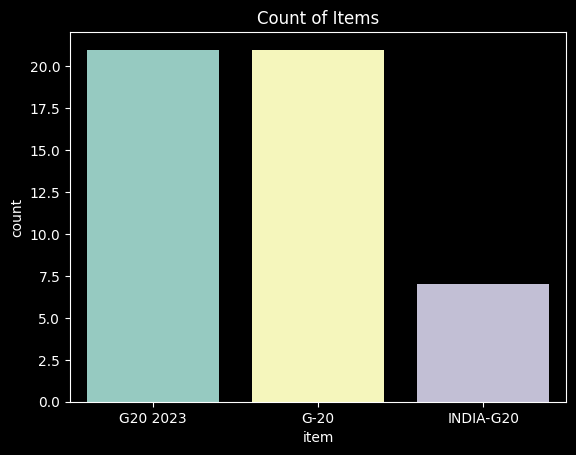

In [18]:
plt.style.use('dark_background')
plt.set_cmap('plasma')
sns.countplot(x='item', data=df)
plt.title('Count of Items')
plt.show()

### Most occuring words

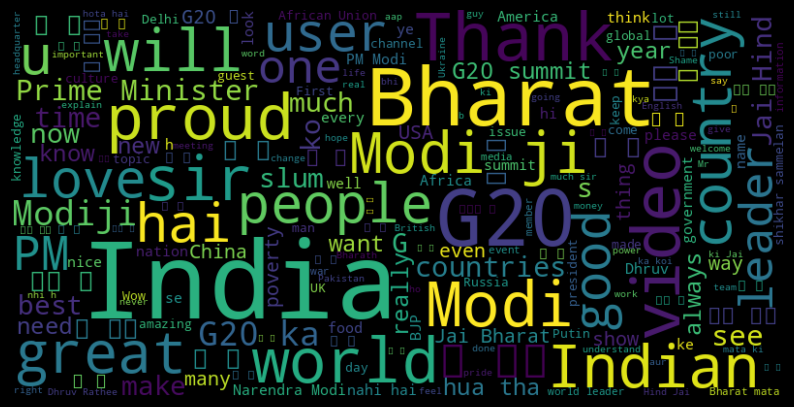

In [ ]:
from wordcloud import WordCloud
all_comments = ' '.join(df['Cleaned_Comments'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_comments)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Plotting the top 10 most frequent video titles

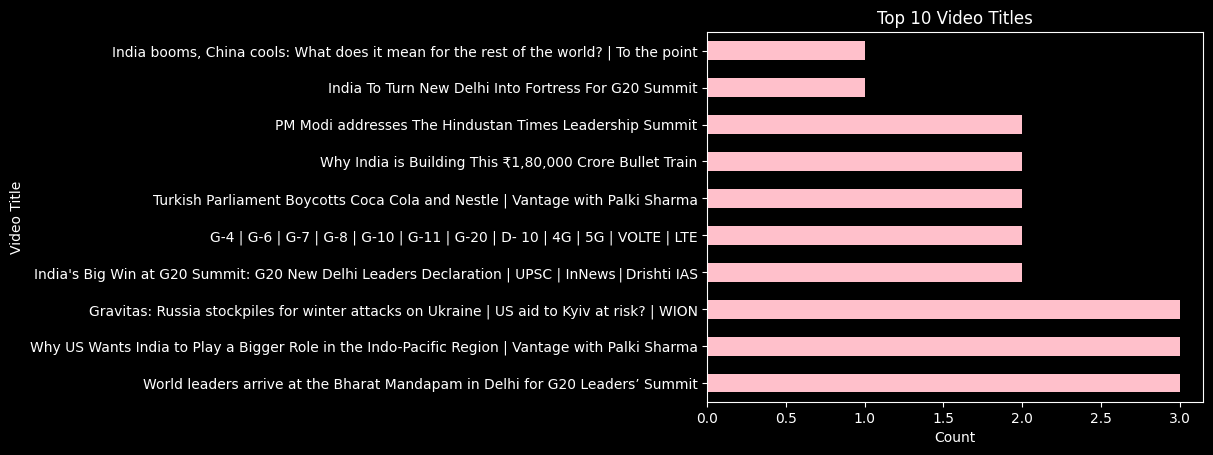

In [ ]:
top_videos = df['Video Title'].value_counts().head(10)
top_videos.plot(kind='barh', color='pink')
plt.title('Top 10 Video Titles')
plt.xlabel('Count')
plt.ylabel('Video Title')
plt.show()


### Ploting the length of comments

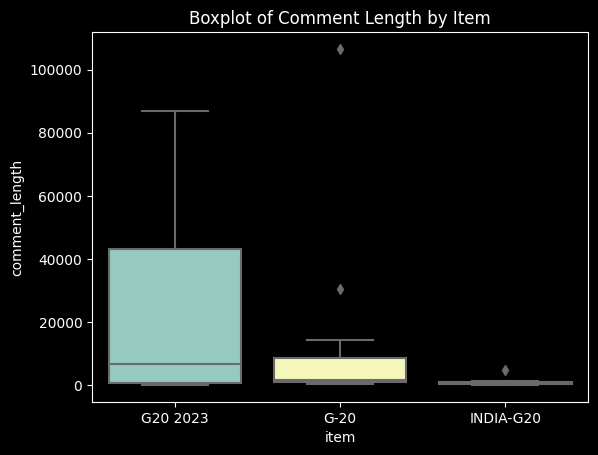

In [ ]:
df['comment_length'] = df['Cleaned_Comments'].apply(len)
sns.boxplot(x='item', y='comment_length', data=df)
plt.title('Boxplot of Comment Length by Item')
plt.show()


# NETWORK ANALYSIS
## Is there any relationship among the comments or videos

### Graph of relationship among comments on all the data values

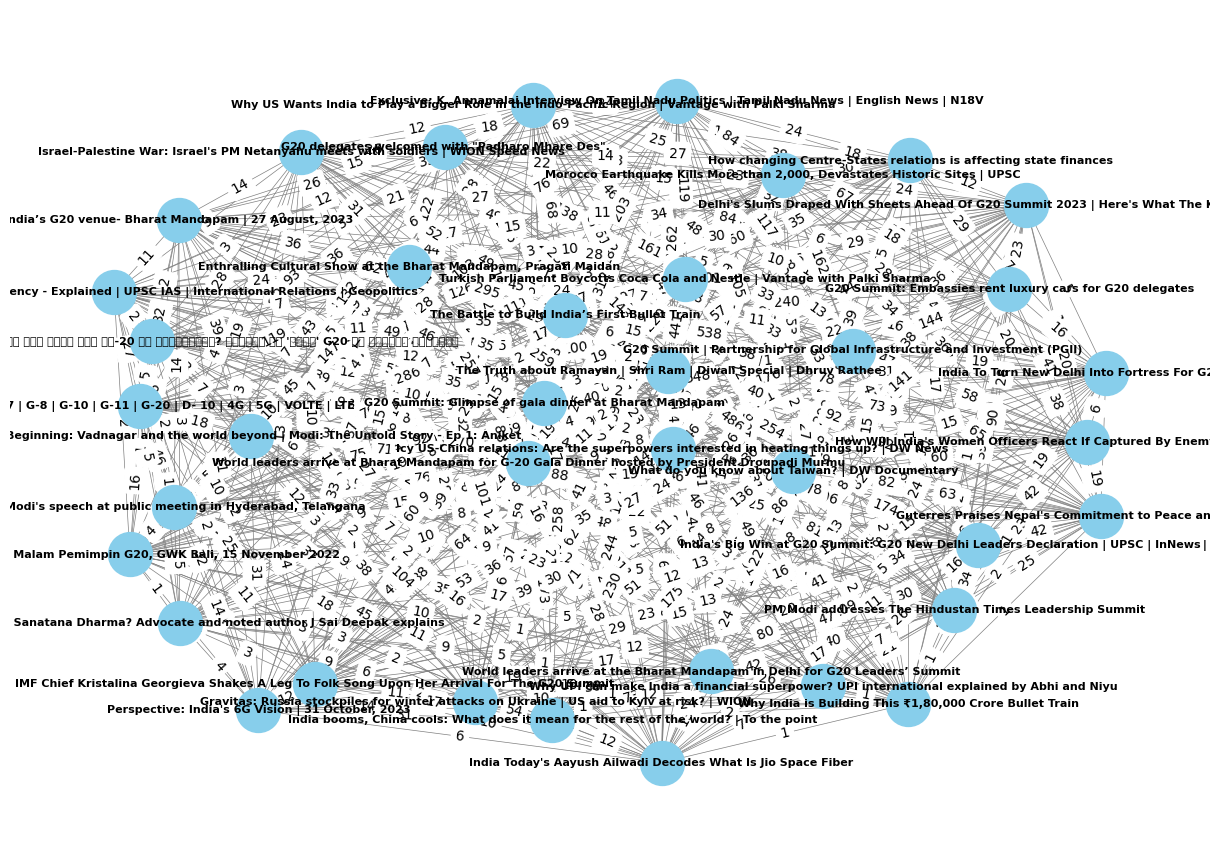

In [ ]:
subset_df = df[['Video Title', 'Cleaned_Comments']]
G = nx.Graph()
G.add_nodes_from(subset_df['Video Title'])

for _, row in subset_df.iterrows():
    video_title = row['Video Title']
    comments = row['Cleaned_Comments'].split()
    for other_video in subset_df['Video Title']:
        if other_video != video_title:
            other_comments = subset_df.loc[subset_df['Video Title'] == other_video, 'Cleaned_Comments'].values[0].split()
            common_comments = set(comments) & set(other_comments)
            if common_comments:
                G.add_edge(video_title, other_video, weight=len(common_comments))
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=15)
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=1000, node_color='skyblue', edge_color='gray', font_weight='bold', width=0.5)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Network Graph of Videos Based on Shared Comments')
plt.show()


### Graph of relationship among comments on most common data values

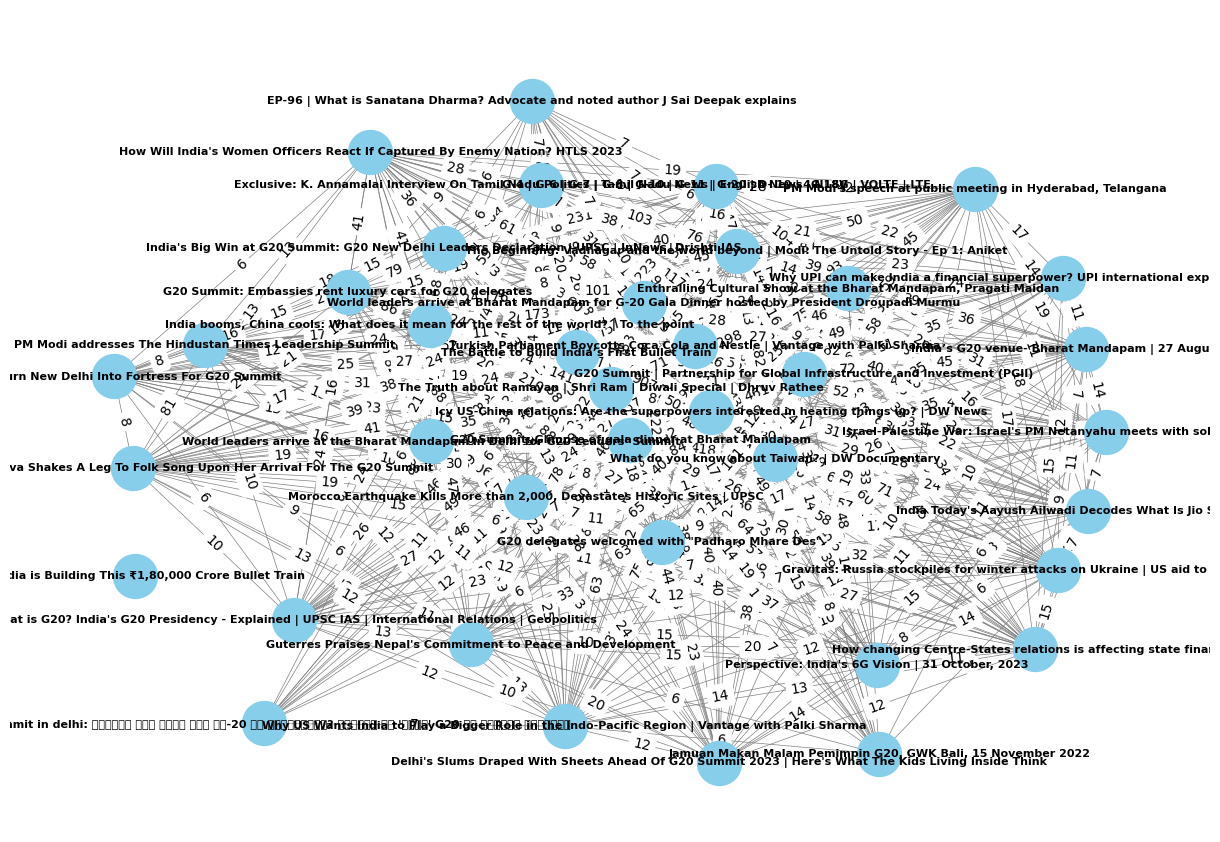

In [ ]:
subset_df = df[['Video Title', 'Cleaned_Comments']]
G = nx.Graph()
G.add_nodes_from(subset_df['Video Title'])
threshold_common_comments = 5
for _, row1 in subset_df.iterrows():
    video1 = row1['Video Title']
    comments1 = set(row1['Cleaned_Comments'].split())

    for _, row2 in subset_df.iterrows():
        video2 = row2['Video Title']

        if video1 != video2:
            comments2 = set(row2['Cleaned_Comments'].split())
            common_comments = comments1 & comments2

            if len(common_comments) > threshold_common_comments:
                G.add_edge(video1, video2, weight=len(common_comments))

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=10)
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=1000, node_color='skyblue', edge_color='gray', font_weight='bold', width=0.5)

# Add edge labels (weights)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Network Graph of Videos Based on Shared Comments (Threshold: {} Common Comments)'.format(threshold_common_comments))
plt.show()


# Topic Analysis in Google Colab

1. Content Summarization:
Objective: Identify key themes within the text.
Benefits: Summarize large datasets by extracting and focusing on the main topics, enabling a quick understanding of content.
2. Content Categorization:
Objective: Group similar documents or texts into categories.
Benefits: Organize information into relevant categories, facilitating efficient retrieval and management of related content.
3. Discovering Trends:
Objective: Uncover patterns and trends within textual data.
Benefits: Identify emerging topics or shifts in discussions over time, aiding in trend analysis.
4. Enhancing Search and Retrieval:
Objective: Improve search functionality by associating documents with relevant topics.
Benefits: Enhance information retrieval systems by linking documents to specific topics, leading to more accurate and efficient searches.
5. Content Recommendation:
Objective: Recommend related content based on topic similarities.
Benefits: Enhance user experience by suggesting content that aligns with a user's interests or preferences.



In [7]:
!pip install nltk pyLDAvis -q

# 1. Content Summarization

## <span style="color:blue">Objective</span>

Identify key themes within the text.

## <span style="color:green">Benefits</span>

Summarize large datasets by extracting and focusing on the main topics, enabling a quick understanding of content.




### Here i am using bert summarizer as it is one of the most efficient.

In [ ]:
!pip install bert-extractive-summarizer -q

In [ ]:
from summarizer import Summarizer
bert_summarizer = Summarizer()
df['Cleaned_Comments'] = df['Cleaned_Comments'].apply(lambda x: re.sub(r"@[\w]+", "", x))
df['Summary'] = df['Cleaned_Comments'].apply(lambda x: bert_summarizer(x))

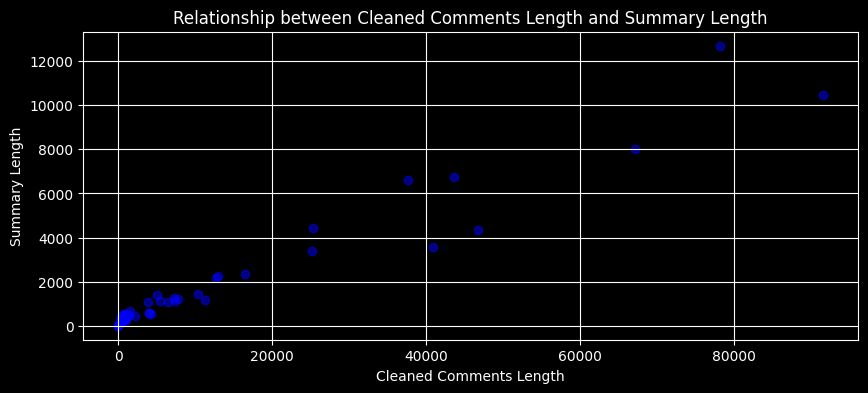

In [22]:
x = df['Cleaned_Comments'].apply(len)
y = df['Summary'].apply(len)

# Plot the graph
plt.figure(figsize=(10, 4))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('Relationship between Cleaned Comments Length and Summary Length')
plt.xlabel('Cleaned Comments Length')
plt.ylabel('Summary Length')
plt.grid(True)
plt.show()

Time taken- 45 mins(approx) and in the above plot we can see summary has 1/10 size of original text.

# 2. Content Categorization

## <span style="color:blue">Objective</span>

Group similar documents or texts into categories.

## <span style="color:green">Benefits</span>

Organize information into relevant categories, facilitating efficient retrieval and management of related content.


#### First using `K-means` approach to cluster the data

In [31]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Comments'])
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(tfidf_matrix)
df.head()

,Video Link,Video Title,Cleaned_Comments,item,Summary,Cluster
0,https://www.youtube.com/watch?v=F1pUDSue8mQ&pp...,World leaders arrive at the Bharat Mandapam in...,- I proud that at this event I worked whole d...,G20 2023,- I proud that at this event I worked whole da...,2
1,https://www.youtube.com/watch?v=X8rM829c7to&pp...,PM Modi addresses The Hindustan Times Leadersh...,- I proud of you modi sir ....I love my INDIA...,G20 2023,- I proud of you modi sir ....I love my INDIA ...,1
2,https://www.youtube.com/watch?v=dbgGV5-TrdE&pp...,India's Big Win at G20 Summit: G20 New Delhi L...,- प्रश्न. G20 की स्थापना किस वर्ष हुई?\n\na. ...,G20 2023,a. 1975 \n\nb. 1999 \n\nc. 2008 \n - First G20...,1
3,https://www.youtube.com/watch?v=G_O8ogCpbRI&pp...,G-4 | G-6 | G-7 | G-8 | G-10 | G-11 | G-20 | D...,- The list of invitees / participants is very...,G20 2023,- The list of invitees / participants is very ...,1
4,https://www.youtube.com/watch?v=Lf-hYTjapiw&pp...,Turkish Parliament Boycotts Coca Cola and Nest...,- Very much proud to see Bharat taking such l...,G20 2023,- Very much proud to see Bharat taking such le...,2


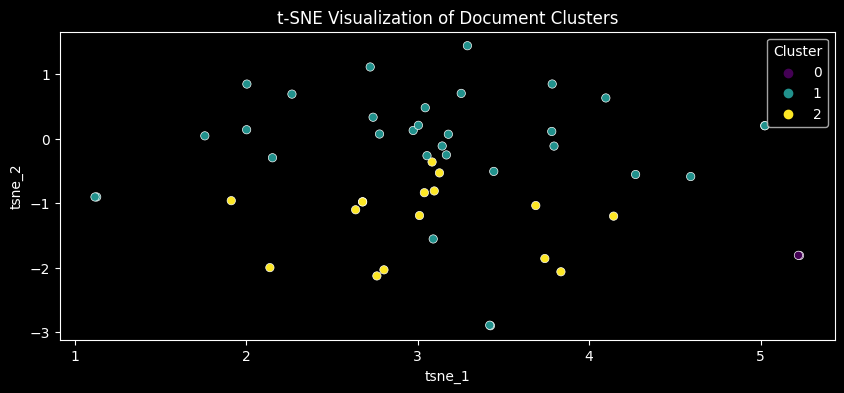

In [37]:
tsne = TSNE(n_components=2, random_state=42, init="random")
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

df['tsne_1'] = tsne_result[:, 0]
df['tsne_2'] = tsne_result[:, 1]

plt.figure(figsize=(10, 4))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('t-SNE Visualization of Document Clusters')
plt.show()


### Using `transformer-pipeline` text clustering

In [40]:
!pip install sentence-transformers -q
!pip install umap-learn -q

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

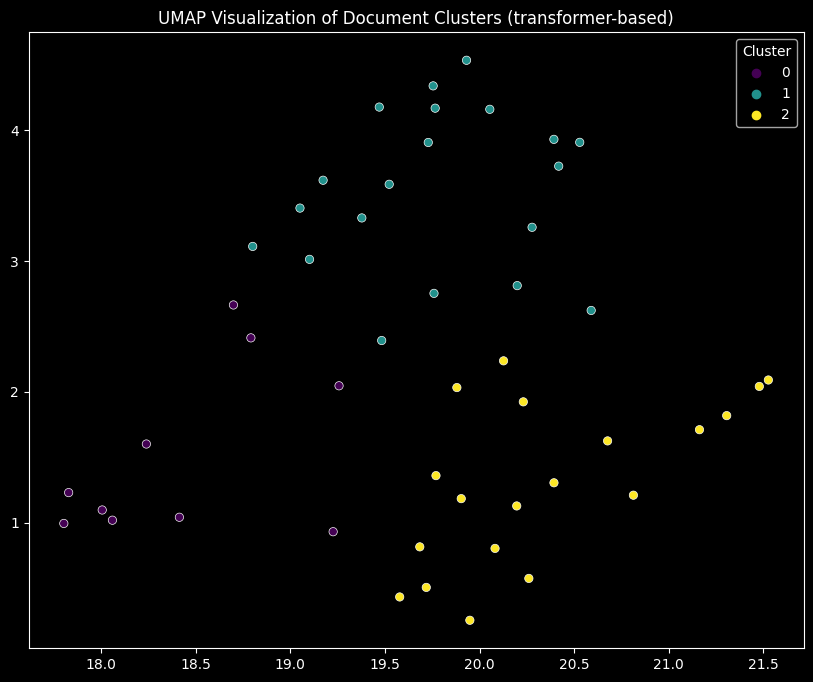

In [43]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(df['Cleaned_Comments'], show_progress_bar=True)
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(umap_embeddings)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=df['Cluster'], palette='viridis', legend='full')
plt.title('UMAP Visualization of Document Clusters (transformer-based)')
plt.show()


In [82]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 25.8 MB/s eta 0:00:00


In [80]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=3, min_dist=0.0, metric='cosine').fit_transform(embeddings)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(umap_embeddings)
plot_df = pd.DataFrame({
    'UMAP Component 1': umap_embeddings[:, 0],
    'UMAP Component 2': umap_embeddings[:, 1],
    'UMAP Component 3': umap_embeddings[:, 2],
    'Cluster': df['Cluster']
})

fig = px.scatter_3d(
    plot_df,
    x='UMAP Component 1',
    y='UMAP Component 2',
    z='UMAP Component 3',
    color='Cluster',
    title='3D UMAP Visualization of Document Clusters (transformer-based)',
    labels={'Cluster': 'Cluster'},
    color_continuous_scale='viridis'
)

# Show the plot
fig.show()
fig.write_html("3D-UMAP-Visualization-of-Document-Clusters.html")

### Clearly we can see transformer approach is better than naive bayes

# 3. Discovering Trends

## **Objective:**
Uncover patterns and trends within textual data.

## **Benefits:**
Identify emerging topics or shifts in discussions over time, aiding in trend analysis.

```python
!pip install scattertext
import scattertext as st
corpus = st.CorpusFromPandas(df, category_col=None, text_col='Cleaned_Comments').build()
html = st.produce_scattertext_explorer(corpus, category_name=None, not_category_name='Other', width_in_pixels=1000)
with open('trend_visualization.html', 'w') as f:
    f.write(html)


# 4. Enhancing Search and Retrieval

## **Objective:**
Improve search functionality by associating documents with relevant topics.

## **Benefits:**
Enhance information retrieval systems by linking documents to specific topics, leading to more accurate and efficient searches.

###Search by Topic:

When users search for articles on a specific topic, leverage the assigned topics to filter and rank the search results.




In [66]:
from gensim import corpora, models
tokenized_docs = [doc.split() for doc in df['Cleaned_Comments']]
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)
print("Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")
df['Topic'] = df['Cleaned_Comments'].apply(lambda x: lda_model.get_document_topics(dictionary.doc2bow(x.split()))[0][0])
df.head()


,Video Link,Video Title,Cleaned_Comments,item,Summary,Cluster,tsne_1,tsne_2,Topic
0,https://www.youtube.com/watch?v=F1pUDSue8mQ&pp...,World leaders arrive at the Bharat Mandapam in...,- I proud that at this event I worked whole d...,G20 2023,- I proud that at this event I worked whole da...,2,2.679146,-0.978640,0
1,https://www.youtube.com/watch?v=X8rM829c7to&pp...,PM Modi addresses The Hindustan Times Leadersh...,- I proud of you modi sir ....I love my INDIA...,G20 2023,- I proud of you modi sir ....I love my INDIA ...,2,2.153263,-0.295764,0
2,https://www.youtube.com/watch?v=dbgGV5-TrdE&pp...,India's Big Win at G20 Summit: G20 New Delhi L...,- प्रश्न. G20 की स्थापना किस वर्ष हुई?\n\na. ...,G20 2023,a. 1975 \n\nb. 1999 \n\nc. 2008 \n - First G20...,1,3.424253,-2.902411,0
3,https://www.youtube.com/watch?v=G_O8ogCpbRI&pp...,G-4 | G-6 | G-7 | G-8 | G-10 | G-11 | G-20 | D...,- The list of invitees / participants is very...,G20 2023,- The list of invitees / participants is very ...,1,2.777393,0.072326,1
4,https://www.youtube.com/watch?v=Lf-hYTjapiw&pp...,Turkish Parliament Boycotts Coca Cola and Nest...,- Very much proud to see Bharat taking such l...,G20 2023,- Very much proud to see Bharat taking such le...,2,3.127025,-0.530775,0


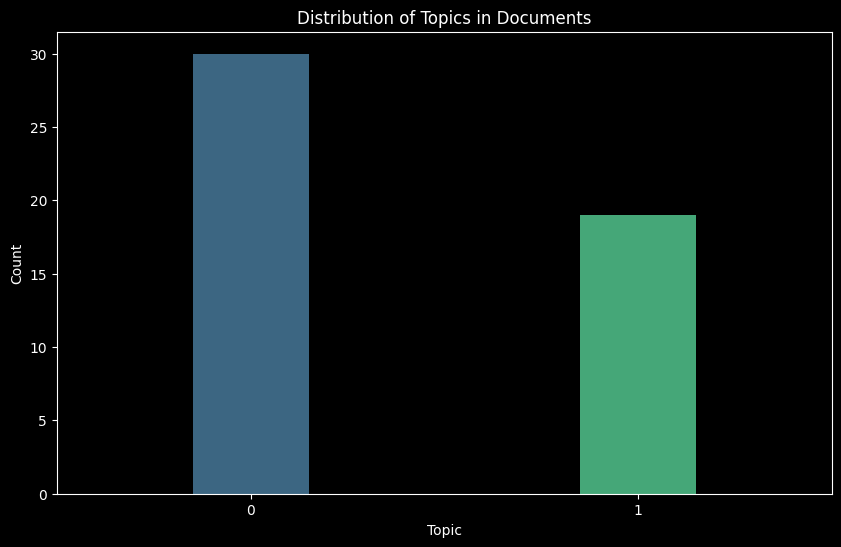

In [70]:
topic_counts = df['Topic'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='Topic', data=df, palette='viridis', order=topic_counts.index, width=0.3)
plt.title('Distribution of Topics in Documents')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

# Content Recommendation Using LDA Topics

## Objective

Recommend related content to users based on topic similarities obtained from Latent Dirichlet Allocation (LDA).

## Benefits

Enhance user experience by suggesting content that aligns with a user's interests or preferences.

## Implementation Steps

1. **Train LDA Model:**
   - Train an LDA model on your corpus of documents to identify latent topics.

2. **Assign Topics to Documents:**
   - Use the trained LDA model to assign dominant topics to each document.

3. **Build Topic Similarity Matrix:**
   - Calculate topic similarities between documents using the assigned topics.

4. **Content Recommendation:**
   - Given a user's preferences or interests (expressed as topics), recommend content with similar topics.

## Python Code

```python
from sklearn.metrics.pairwise import cosine_similarity
topic_similarity_matrix = cosine_similarity(lda_model.get_topics(), lda_model.get_topics())

def recommend_content(user_topics, df, topic_similarity_matrix):
    user_topics_vector = [1 if i in user_topics else 0 for i in range(lda_model.num_topics)]
    document_topics_matrix = lda_model.get_document_topics(df['Cleaned_Content'].apply(lambda x: dictionary.doc2bow(x.split())))
    document_topics_vector = [max(dict(doc_topics).items(), key=lambda x: x[1])[0] for doc_topics in document_topics_matrix]
    similarities = cosine_similarity([user_topics_vector], [topic_similarity_matrix[topic] for topic in document_topics_vector])
    df['Similarity'] = similarities[0]
    recommended_content = df.sort_values(by='Similarity', ascending=False)['Cleaned_Content'].tolist()

    return recommended_content

user_preferred_topics = [1, 2]
recommended_content = recommend_content(user_preferred_topics, df, topic_similarity_matrix)
print("Recommended Content:")
print(recommended_content)


In [75]:
len(recommended_content)

49